In [4]:
from google.colab import files
uploaded = files.upload()



Saving cardio_train (1).csv to cardio_train (1).csv


✅ Dataset loaded successfully!
Shape: (70000, 13)

Columns:
 Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

Sample data:
    id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  

Checking missing values:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
a

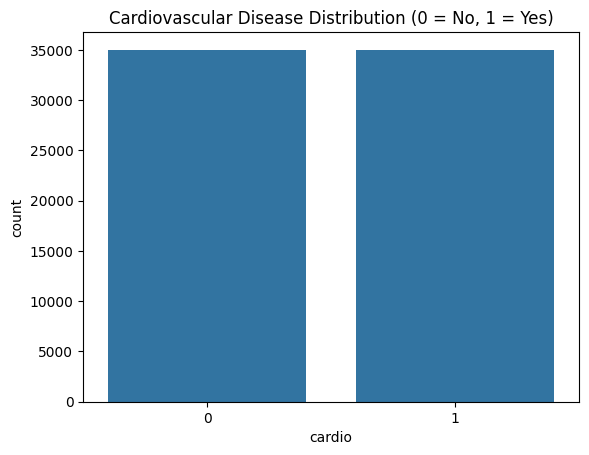

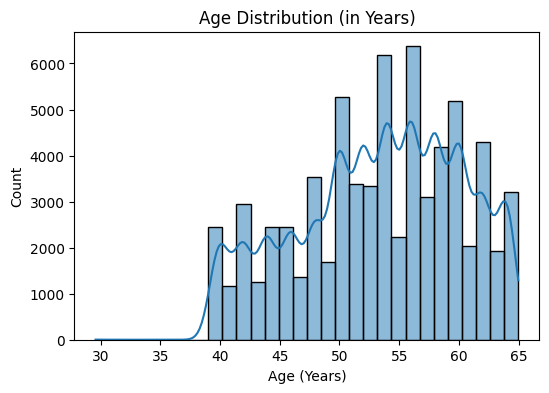

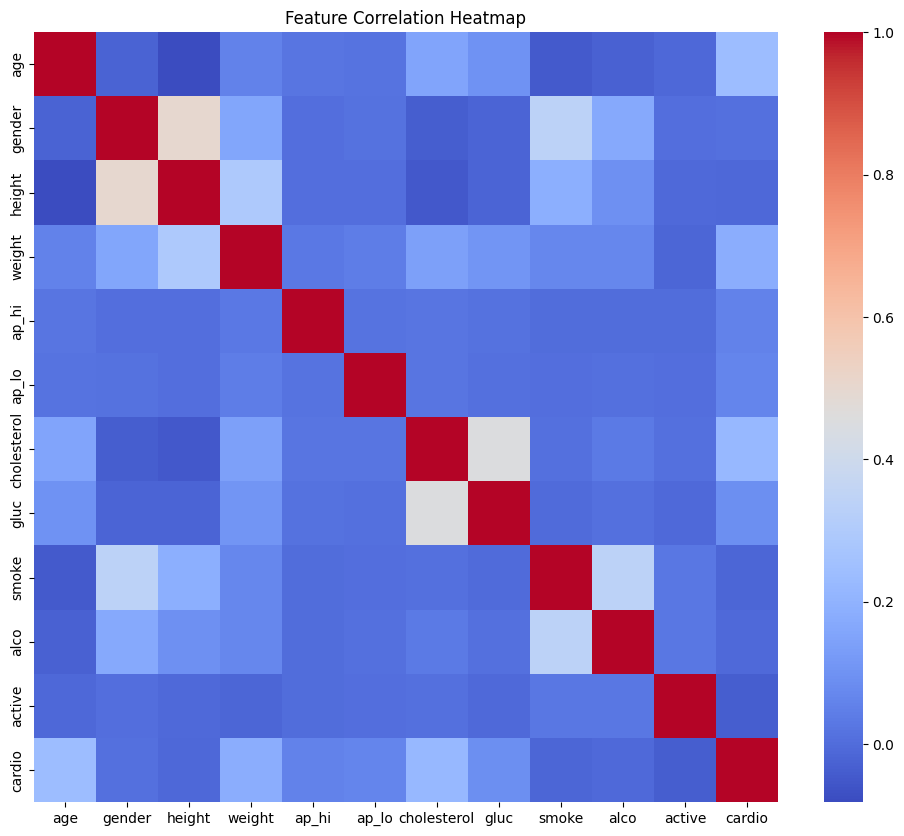


📊 Logistic Regression
Accuracy: 0.7139
Confusion Matrix:
 [[5271 1733]
 [2273 4723]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72      7004
           1       0.73      0.68      0.70      6996

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000


📊 SVM
Accuracy: 0.7254
Confusion Matrix:
 [[5298 1706]
 [2139 4857]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.76      0.73      7004
           1       0.74      0.69      0.72      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000


📊 KNN
Accuracy: 0.6506
Confusion Matrix:
 [[4663 2341]
 [2551 4445]]
Classification Report:
               precision    recall  f1-score   su

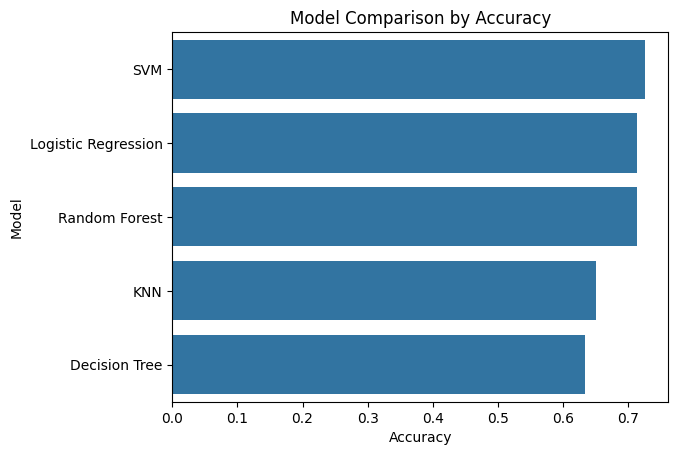


🏆 Best Model: SVM with Accuracy = 0.73


In [5]:
# ================================
# Cardiovascular Disease Prediction
# ================================

# Install libraries if needed (uncomment below for Colab)
# !pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------------------
# 1. Load Dataset
# ------------------------------
df = pd.read_csv('cardio_train (1).csv', sep=';')
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nSample data:\n", df.head())

# ------------------------------
# 2. Data Preprocessing
# ------------------------------
print("\nChecking missing values:")
print(df.isnull().sum())

# Remove ID column if exists
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Feature & Target split
X = df.drop('cardio', axis=1)
y = df['cardio']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 3. Data Visualization (EDA)
# ------------------------------
print("\nCreating visualizations...")

# Target distribution
sns.countplot(x=y)
plt.title("Cardiovascular Disease Distribution (0 = No, 1 = Yes)")
plt.show()

# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df['age']/365, bins=30, kde=True)
plt.title("Age Distribution (in Years)")
plt.xlabel("Age (Years)")
plt.show()

# Correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# ------------------------------
# 4. Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# ------------------------------
# 5. Model Training & Evaluation
# ------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))

    print(f"\n📊 {name}")
    print("Accuracy:", round(acc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# 6. Compare Model Accuracies
# ------------------------------
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print("\n==============================")
print("Model Accuracy Comparison")
print("==============================")
print(results_df)

sns.barplot(x='Accuracy', y='Model', data=results_df)
plt.title("Model Comparison by Accuracy")
plt.show()

# ------------------------------
# 7. Best Model
# ------------------------------
best_model = results_df.iloc[0]
print(f"\n🏆 Best Model: {best_model['Model']} with Accuracy = {best_model['Accuracy']:.2f}")



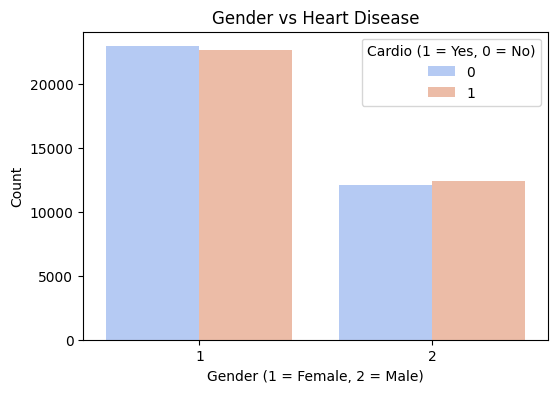

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='cardio', data=df, palette='coolwarm')
plt.title("Gender vs Heart Disease")
plt.xlabel("Gender (1 = Female, 2 = Male)")
plt.ylabel("Count")
plt.legend(title="Cardio (1 = Yes, 0 = No)")
plt.show()


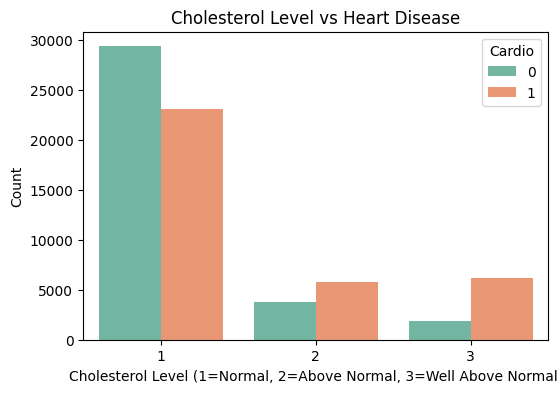

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='cholesterol', hue='cardio', data=df, palette='Set2')
plt.title("Cholesterol Level vs Heart Disease")
plt.xlabel("Cholesterol Level (1=Normal, 2=Above Normal, 3=Well Above Normal)")
plt.ylabel("Count")
plt.legend(title="Cardio")
plt.show()


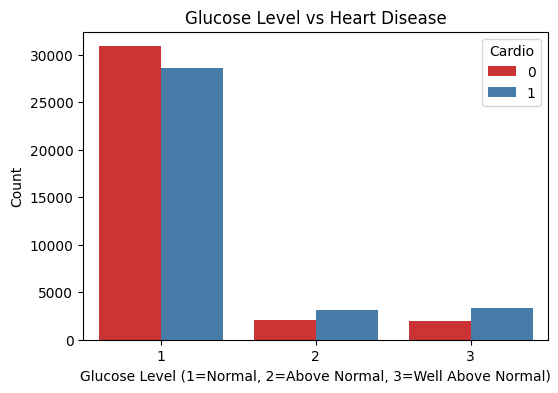

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='gluc', hue='cardio', data=df, palette='Set1')
plt.title("Glucose Level vs Heart Disease")
plt.xlabel("Glucose Level (1=Normal, 2=Above Normal, 3=Well Above Normal)")
plt.ylabel("Count")
plt.legend(title="Cardio")
plt.show()


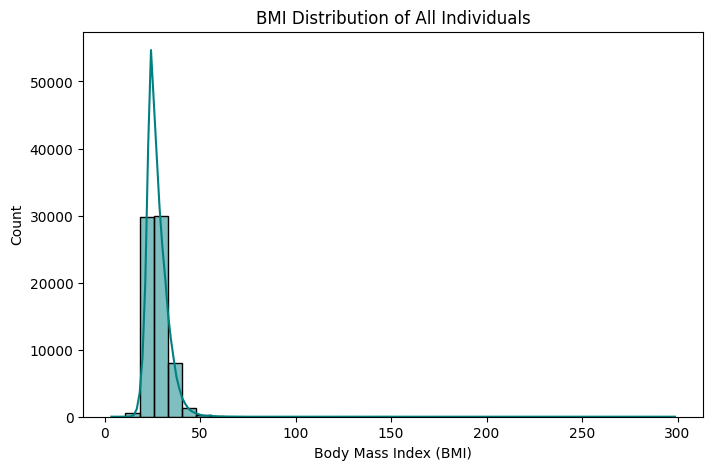

In [9]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)
plt.figure(figsize=(8,5))
sns.histplot(df['BMI'], bins=40, kde=True, color='teal')
plt.title("BMI Distribution of All Individuals")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Count")
plt.show()


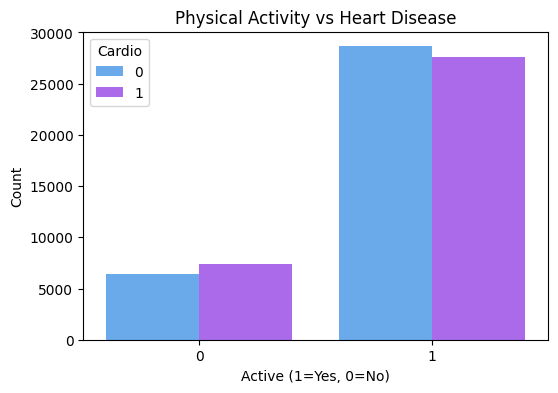

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='active', hue='cardio', data=df, palette='cool')
plt.title("Physical Activity vs Heart Disease")
plt.xlabel("Active (1=Yes, 0=No)")
plt.ylabel("Count")
plt.legend(title="Cardio")
plt.show()


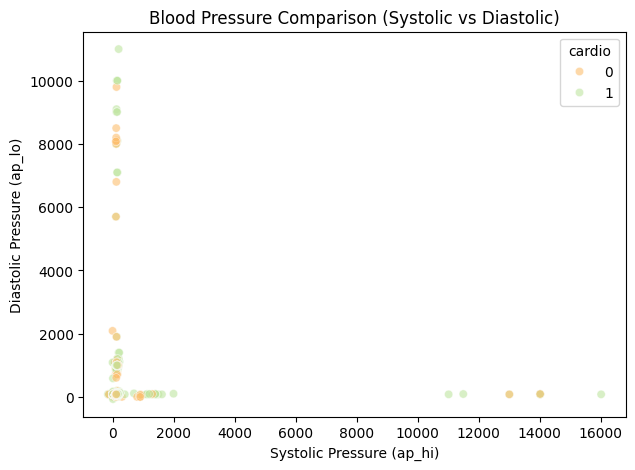

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='ap_hi', y='ap_lo', hue='cardio', data=df, alpha=0.6, palette='Spectral')
plt.title("Blood Pressure Comparison (Systolic vs Diastolic)")
plt.xlabel("Systolic Pressure (ap_hi)")
plt.ylabel("Diastolic Pressure (ap_lo)")
plt.show()


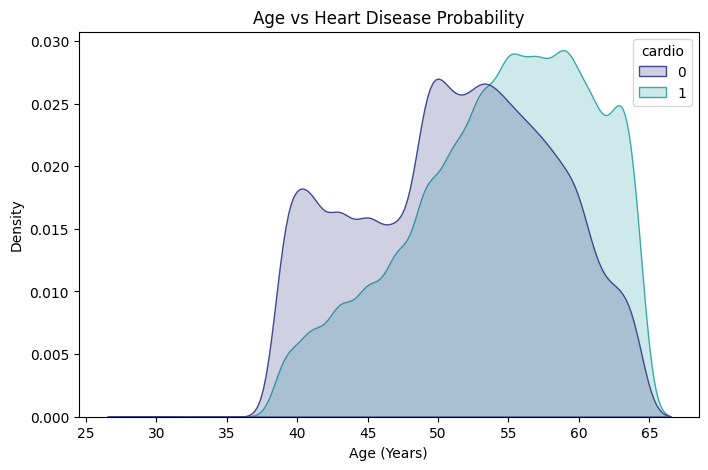

In [12]:
df['Age_years'] = (df['age'] / 365).astype(int)
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Age_years', hue='cardio', fill=True, palette='mako')
plt.title("Age vs Heart Disease Probability")
plt.xlabel("Age (Years)")
plt.ylabel("Density")
plt.show()


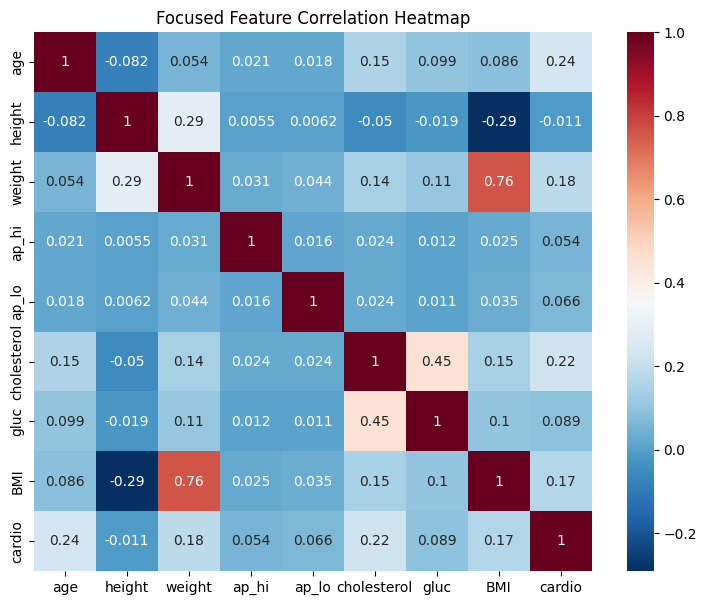

In [13]:
cols = ['age','height','weight','ap_hi','ap_lo','cholesterol','gluc','BMI','cardio']
plt.figure(figsize=(9,7))
sns.heatmap(df[cols].corr(), annot=True, cmap='RdBu_r')
plt.title("Focused Feature Correlation Heatmap")
plt.show()


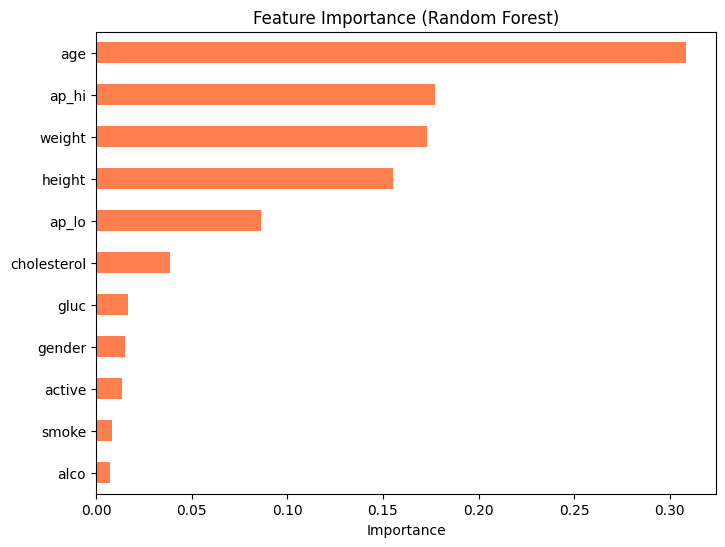

In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(8,6))
feat_imp.plot(kind='barh', color='coral')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()
